Question 6 - Open-Ended Analysis

- Perform a comparative analysis of your choice. Ensure that you provide accurate information and compelling visual storytelling with the data. Explain all steps and justify your analysis based on the supporting data.
- Create at least 5 visualizations that tell a complete story about your chosen comparison.

In [62]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Load selected columns from the dataset
q6_cols = [
    'Purpose.of.flight', 'Broad.phase.of.flight', 'Weather.Condition',
    'Engine.Type', 'Number.of.Engines', 'Total.Fatal.Injuries'
]
q6_df = pd.read_csv('NTSBAviationData.csv', encoding='latin1', usecols=q6_cols)
q6_df.head()

C:\Users\nawib\AppData\Local\Temp\ipykernel_11668\2478347620.py:6: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  q6_df = pd.read_csv('NTSBAviationData.csv', encoding='latin1', usecols=q6_cols)


,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight
0,1.0,Reciprocating,Personal,2.0,UNK,Cruise
1,1.0,Reciprocating,Personal,4.0,UNK,Unknown
2,1.0,Reciprocating,Personal,3.0,IMC,Cruise
3,1.0,Reciprocating,Personal,2.0,IMC,Cruise
4,NaN,NaN,Personal,1.0,VMC,Approach


In [64]:
# clean up column names and prep fatality flag
q6_df.rename(columns={
    'Purpose.of.flight': 'purpose',
    'Broad.phase.of.flight': 'phase',
    'Weather.Condition': 'weather',
    'Total.Fatal.Injuries': 'fatal_inj'
}, inplace=True)

q6_df['purpose'] = q6_df['purpose'].str.strip()
q6_df['fatal'] = (q6_df['fatal_inj'].fillna(0) > 0).astype(int)

# Filter for 3 main GA missions
missions = ['Personal', 'Instructional', 'Aerial Application']
q6_df = q6_df[q6_df['purpose'].isin(missions)]
q6_df = q6_df.dropna(subset=['purpose'])

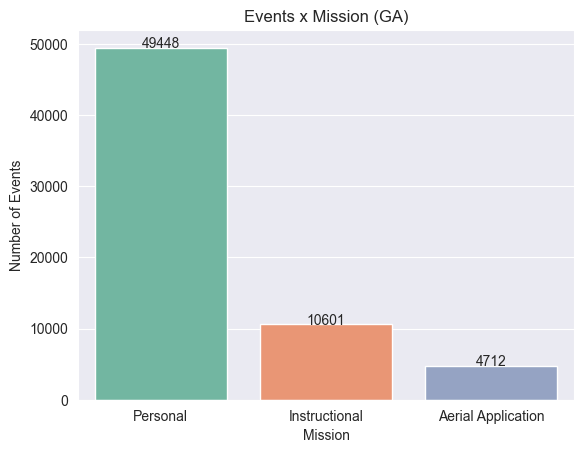

In [65]:
# color palette for all viz
sns.set_palette('Set2')

events = q6_df['purpose'].value_counts().reindex(missions)

sns.barplot(x=events.index, y=events.values)
plt.title('Events x Mission (GA)')
plt.ylabel('Number of Events')
plt.xlabel('Mission')

for i, val in enumerate(events.values):
    plt.text(i, val + 1, f'{val:.0f}', ha='center')

plt.show()

Explanation:
- The visualization shows the distribution of events by the missions within the GA (General Aviation) subset.
- Personal flights dominate the total amount of events at ~50k, followed by Instructional Missions at 10k and Aerial Application at 4.7k.
- We can conclude that Personal flights make up the majority of Events/Incidents within the dataset.

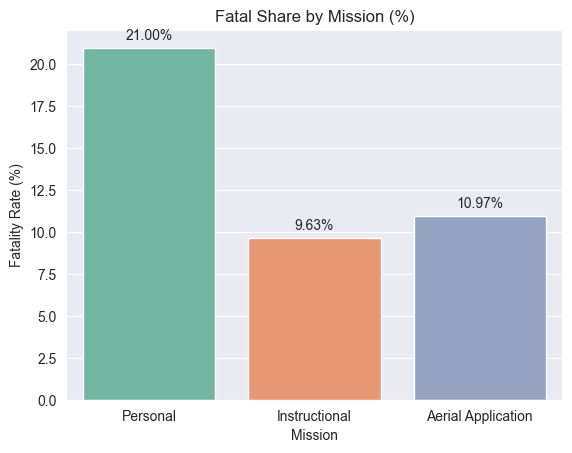

In [66]:
fatal_pct = q6_df.groupby('purpose')['fatal'].mean().mul(100).reindex(missions)

sns.barplot(x=fatal_pct.index, y=fatal_pct.values)
plt.title('Fatal Share by Mission (%)')
plt.ylabel('Fatality Rate (%)')
plt.xlabel('Mission')

for i, val in enumerate(fatal_pct.values):
    plt.text(i, val + 0.5, f'{val:.2f}%', ha='center')

plt.show()

Explanation:
- The visualization shows the proportion of fatal outcomes by each GA Mission type.
- Personal aviation came in the highest at 21%, followed by Aerial Application at 10.97% and then Instructional Mission at 9.63%.
- We can conclude that the Mission type has a big influence not only on the number of events that occur, but as well as the Fatality % within general aviation.
- Personal flights are much more dangerous when compared to Instructional and Aerial Applications.

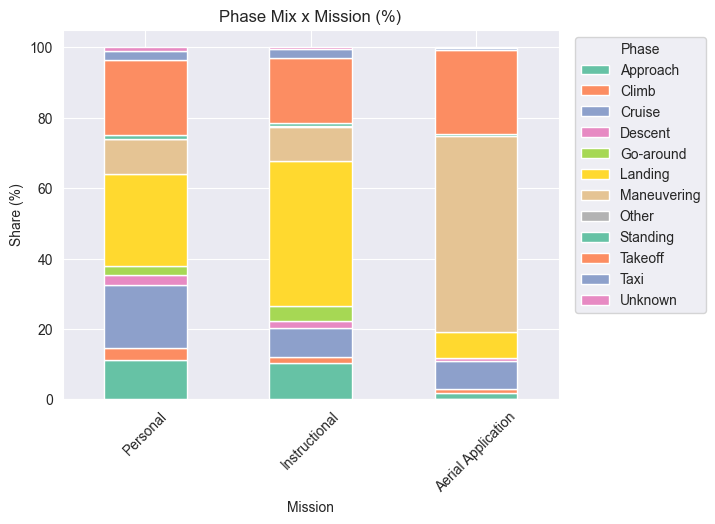

In [67]:
phase_data = q6_df.dropna(subset=['phase'])
phase_mix = pd.crosstab(phase_data['purpose'], phase_data['phase'], normalize='index') * 100
phase_mix = phase_mix.reindex(index=missions).round(2).fillna(0)

phase_mix.plot(kind='bar', stacked=True)
plt.title('Phase Mix x Mission (%)')
plt.xlabel('Mission')
plt.ylabel('Share (%)')
plt.xticks(rotation=45)
plt.legend(title='Phase', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.show()

Explanation:
- The chart shows the distribution of Events as a %, per Mission type, and Phase type (color).
- The Instructional mission shows much more events during the Landing phase, which can be attributed to the repeated takeoffs and landings that Instructional missions have when compared to other flight phases.
- Personal missions show that Landing is also a big part of events, but also that Cruising and Maneuvering are something that need to be watched.
- Aerial Application is more about movement in the air, which reflects in the chart, showing that Maneuvering and Climbing are the largest % where events occur.

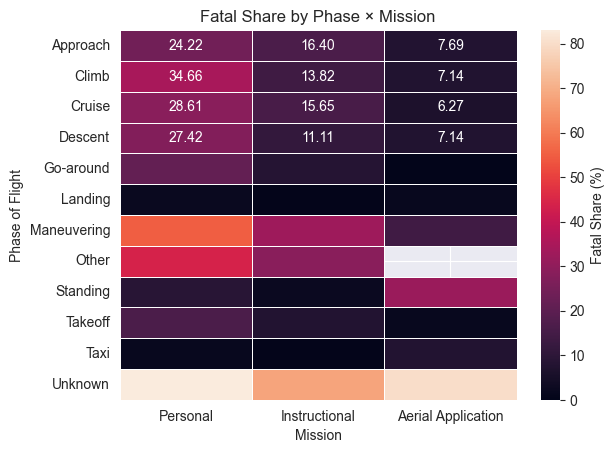

In [68]:
# compute fatal share by phase and mission
phase_data = q6_df.dropna(subset=['phase'])
fatal_rates = phase_data.groupby(['phase', 'purpose'])['fatal'].mean().unstack().mul(100)
fatal_rates = fatal_rates[missions].round(2)  # keep mission order

sns.heatmap(fatal_rates, annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Fatal Share (%)'})
plt.title('Fatal Share by Phase × Mission')
plt.ylabel('Phase of Flight')
plt.xlabel('Mission')
plt.show()

Explanation:
- The visualizations shows the fatal % of events by Mission type and Phase of Flight.
- Personal is extremely high in Climbing (34.66%), Cruising (28.61%), Descent (27.42%) and Approach (24.22%). These are the phases with the most movement by the pilot (so they're bad pilots), same with Maneuvering.
- Instructional is lower across all phases, which tells that the supervision works to lower the overall fatality
- Aerial Application is more about movement in the air, which means the traditional Approach, Climb, Cruise Descent, are overall lower fatality shares.
- 'Unknown' is a high % for all. The missing/unavailable data would paint a much clearer picture for the fatality % by flight phase and mission.

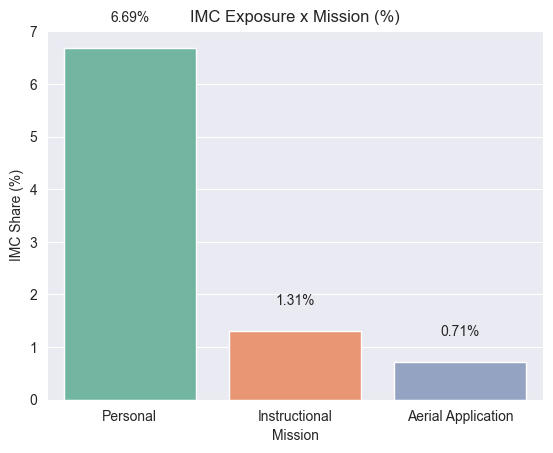

In [69]:
weather_data = q6_df.dropna(subset=['weather']).copy()
weather_data['weather'] = weather_data['weather'].str.upper().str.strip()

weather_data['imc'] = (weather_data['weather'] == 'IMC').astype(int)
imc_rates = weather_data.groupby('purpose')['imc'].mean().mul(100).reindex(missions).round(2)

sns.barplot(x=imc_rates.index, y=imc_rates.values)
plt.title('IMC Exposure x Mission (%)')
plt.ylabel('IMC Share (%)')
plt.xlabel('Mission')

for i, val in enumerate(imc_rates.values):
    plt.text(i, val + 0.5, f'{val:.2f}%', ha='center')

plt.show()

Explanation:
- The chart shows the % of events that ocurred within each mission, for only the IMC (instrument meteorological conditions)
- Personal (6.69%) is much higher than Instructional (1.31%) or Aerial (0.71%)
- IMC, or instrument-measured weather conditions greatly increases the severity of the events, particularly for the Personal aviation group.
- Weather is another part of the story within the events, especially for the Personal group.